# **Data Extraction & Feature Modeling**  
The given files `train3.txt` and `train5.txt` contain 8 x 8 matrix indicating whether a bit is on or off on the bitmap image of handwritten digit (either 3 or 5). Let's read these files into a combined list and shuffle the data randomly while keeping track of the bitmaps of 3 & 5. Post shuffling, let's split the combined list into features & labels.   

**Features - ** Feature vector for our problem can be a 1 x 64 vector with each element denoting a pixel in our 8 x 8 bmp image being set or no. Designed such an extensive feature vector is feasible because of the lesser dimension of our input image. If our input image were a huge 1920 x 2048 HD image, the feature vector length is of the order of 10^8 which is not good. Maybe we can summarize the very high dimensional features using fewer dimensions through PCA and use the reduced feature vector for classification. When we look closely into our images we can see that the majority of the corners are always OFF and those will not influence the output of our classifier. These kind of redundant informations will be filtered by PCA for a smaller dimensional feature vector.  
  
**Labels - ** Labels for our problem are 1 and 0, 1 if the image is classified as a handwritten 3 and 0 if the image is classified as a handwritten 5.

In [186]:
Xcomby = []

with open('new_train3.txt') as f:
    content = f.readlines()
    
content = [line.strip() for line in content]
for line in content:
    datum = line.split(" ")
    datum = list(map(float,datum))
    datum.extend([3])
    Xcomby.append(datum)
    
with open('new_train5.txt') as f:
    content = f.readlines()
    
content = [line.strip() for line in content]
for line in content:
    datum = line.split(" ")
    datum = list(map(int,datum))
    datum.extend([5])
    Xcomby.append(datum)
    
import numpy as np
np.random.shuffle(Xcomby)

In [187]:
train_X = []
train_y = []
for datum in Xcomby:
    train_X.append(datum[:64])
    train_y.append(1 if datum[64]==3 else 0)

**Initial weight vector**

In [188]:
theta = [0.0]*64

# **Gradient Ascent**

We aim to classify the features as labels by trying to find the probability **P(label|features)**. Training our model amounts to finding the values of theta, that maximises the likelihood of label being True given features. We can see our problem as finding the best theta, that maximises the log likelihood of label being true given features. Optimization problems can be solved by many ways. Here we are using gradient ascent for maximization of Log-Likelihood. The update rule for gradient ascent uses a **step-size** which decides how fast the theta converges to maximum. But however, large values of step-size may lead to gradient descent bouncing off away from maxima, and never converging. Thus we need to choose smaller values of step-size, but not to small which might take forever to converge

In [189]:
from math import exp
from math import log

def inner(x,y):
    return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
    return 1.0 / (1 + exp(-x))
    
def log_likelihood(theta, X, y, lam):
    ll = 0.0 
    for i in range(len(X)):
        logit = inner(X[i], theta)
        sig = sigmoid(logit)
        if y[i]:
            ll += log(sig)
        if not y[i]:
            ll += log(1-sig)
    for k in range(len(theta)):
        ll += lam * theta[k] * theta[k]
    return ll


def gradient_log_likelihood(theta, X, y, lam):
    dl = [0.0]*len(theta) 
    # dl will store the partial derivatives of log_likelihood
    # with respect to every possible theta
    for j in range(len(theta)):
        dl[j] = 0.0
        for i in range(len(X)):
            logit = inner(X[i], theta)
            sig = sigmoid(logit)
            if y[i]:
                dl[j] += (1-sig)*X[i][j]
            if not y[i]:
                dl[j] -= sig*X[i][j]
        dl[j] += 2*lam*theta[j]
    return np.array([x for x in dl])


def check_convergence(theta1, theta2):
    sum_cc = 0
    theta1 = np.array(theta1)
    theta2 = np.array(theta2)
    sum_cc = sum((theta1-theta2)**2)
    return True if sum_cc < 0.0005 else False


def gradient_ascent(theta, X, y, regularizer, step_size):
    ll_values = []
    prev_theta = theta
    curr_theta = theta + step_size * \
    gradient_log_likelihood(theta, X, y, regularizer)
    while not check_convergence(prev_theta, curr_theta):
        prev_theta = curr_theta
        ll_value = log_likelihood(curr_theta, X, y, regularizer)
        ll_values.append(ll_value)
        curr_theta = prev_theta + step_size * \
        gradient_log_likelihood(prev_theta, X, y, regularizer)
    return curr_theta, ll_values

In [190]:
theta,log_likelihood = gradient_ascent(theta,train_X, train_y, 1.0, 0.001)

# **Plotting Log-Likelihood**

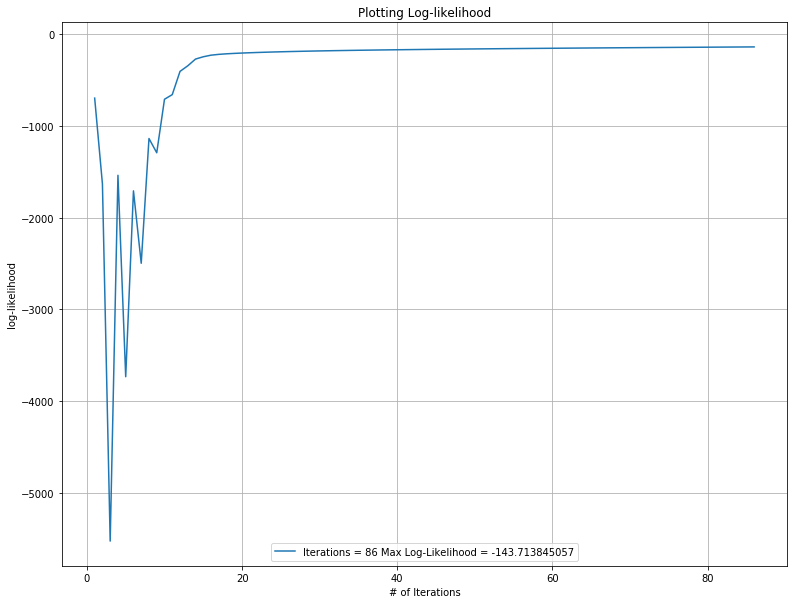

In [212]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
ax = plt.axes()
x = [i+1 for i in range(len(log_likelihood))]

plt.plot(x,log_likelihood, \
         label='Iterations = {} Max Log-Likelihood = {}'\
         .format(len(log_likelihood),log_likelihood[len(log_likelihood)-1]))
plt.title("Plotting Log-likelihood")
plt.xlabel("Iterations")
ax.legend(loc="lower center")
plt.ylabel("log-likelihood")
plt.grid()
plt.show()

# **Optimal Theta**
The theta or weight vector is represented below as 8 x 8 matrix. Intuitively, the weights of pixels which are OFF in most of the samples will be very low when compared to the weights of the pixels that actually contribute to or influence the classifier.

In [219]:
print_theta = theta
print_theta = np.round(theta,3)
print_theta.reshape(8,8)

array([[ 0.635,  0.865,  1.063,  1.026,  0.905, -0.023, -0.939, -1.599],
       [-0.126, -0.199, -0.179,  0.134, -0.13 , -0.428,  0.68 ,  0.614],
       [-1.308, -1.248, -1.168, -0.608, -0.075,  1.46 ,  2.459,  2.009],
       [-1.132, -0.888, -0.743,  0.222,  0.721,  0.569,  0.08 ,  0.224],
       [-0.334, -0.252, -0.022,  0.319,  0.44 ,  0.503,  0.224,  0.463],
       [-0.739,  0.3  , -0.152, -0.431, -0.254,  0.102,  0.123,  0.983],
       [-0.422, -0.243, -0.535, -0.352, -0.054,  0.054, -0.301,  0.764],
       [ 0.225, -0.397, -0.517, -0.757, -0.35 , -0.459,  0.221,  0.214]])

# **Classifier Evaluation function**
The following function takes labels & predictions and calculates the Accuracy & Error Rate of the classifier. The function also returns counts for True Postives, True Negatives, False Positives and False Negatives.

In [230]:
def classifier_evaluation(labels, preds):
    tp=tn=fp=fn=acc=0
    for label,pred in zip(labels,preds):
        if label==1 and pred==1:
            tp=tp+1
            acc=acc+1
        if label==0 and pred==0:
            tn=tn+1
            acc=acc+1
        if label==0 and pred==1:
            fp=fp+1
        if label==1 and pred==0:
            fn=fn+1
    accuracy = (acc*1.0)/len(preds)
    print "Accuracy %: ",accuracy * 100
    print "Error Rate %: ",(1-accuracy) * 100
    print "True Positive: ", tp, "True Negative: ", tn
    print "False Positive: ", fp, "False Negative: ", fn

# **How good is our classifier?**
We read files into lists independantly and run our model's weight vector on it to obtain a classification of whether it's 3 or 5. Since the data contains either only 3s or only 5s all the time we record 0s for counts sometimes and that's okay.

In [231]:
test3 = []
test5 = []
train3 = []
train5 = []

with open('new_train3.txt') as f:
    content = f.readlines()
    
content = [line.strip() for line in content]
for line in content:
    datum = line.split(" ")
    datum = list(map(float,datum))
    train3.append(datum)

with open('new_train5.txt') as f:
    content = f.readlines()
    
content = [line.strip() for line in content]
for line in content:
    datum = line.split(" ")
    datum = list(map(float,datum))
    train5.append(datum)

with open('new_test3.txt') as f:
    content = f.readlines()
    
content = [line.strip() for line in content]
for line in content:
    datum = line.split(" ")
    datum = list(map(float,datum))
    test3.append(datum)

with open('new_test5.txt') as f:
    content = f.readlines()
    
content = [line.strip() for line in content]
for line in content:
    datum = line.split(" ")
    datum = list(map(float,datum))
    test5.append(datum)

**Performance on hw5_train3.txt**

In [232]:
train3_pred = [1 if sigmoid(inner(d,theta))>0.5 else 0 for d in train3]
classifier_evaluation([1]*len(train3), train3_pred)

Accuracy %:  96.2857142857
Error Rate %:  3.71428571429
True Positive:  674 True Negative:  0
False Positive:  0 False Negative:  26


**Performance on hw5_train5.txt**

In [223]:
train5_pred = [1 if sigmoid(inner(d,theta))>0.5 else 0 for d in train5]
classifier_evaluation([0]*len(train5), train5_pred)

Accuracy:  0.95
Error Rate:  0.05
True Positive:  0 True Negative:  665
False Positive:  35 False Negative:  0


**Performance on hw5_test3.txt**

In [224]:
test3_pred = [1 if sigmoid(inner(d,theta))>0.5 else 0 for d in test3]
classifier_evaluation([1]*len(test3), test3_pred)

Accuracy:  0.9525
Error Rate:  0.0475
True Positive:  381 True Negative:  0
False Positive:  0 False Negative:  19


**Performance on hw5_test5.txt**

In [225]:
test5_pred = [1 if sigmoid(inner(d,theta))>0.5 else 0 for d in test5]
classifier_evaluation([0]*len(test5), test5_pred)

Accuracy:  0.955
Error Rate:  0.045
True Positive:  0 True Negative:  382
False Positive:  18 False Negative:  0
